# Predicting Heart Disease with Logistic Regression


## The Framingham Heart Study

The Framingham Heart Study is a long term prospective study of the etiology of cardiovascular disease among a population of free living subjects in the community of Framingham, Massachusetts. It was the first prospective study of cardiovascular disease which identified the concept of risk factors and their joint effects.

In this session, we will train and evaluate a multivariate logistic regression model to predict an individual's ten year risk of developing coronary heart disease (CHD).


## The goals of this analysis

*   Can we predict the 10-year risk of CHD for a health individual?
*   How can we evaluate and interpret the resulting model?

## Data Description

We will use an anonymized sample of 4,240 participants from the original FHS cohort. Each row will correspond to a healthy individual who was free of heart disease at the time of the observation. Our outcome of interest is whether the individual was diagnosed with CHD in the course of the next 10 years.

This dataset contains the following columns:

*  **male**: Gender of the participant (1 = male).

*  **age**: Age at exam (years).

*  **education**: Attained Education. Note that 1 = 0-11 years; 2 = High School Diploma; GED 3 = Some College; Vocational School 4 = College (BS, BA) degree or more.

*  **currentSmoker**: Current cigarette smoking at exam.

*  **cigsPerDay**: Number of cigarettes smoked each day.

*  **BPMeds**: Use of Anti-hypertensive medication at exam.

*  **prevalentStroke**: History of a previous stroke event.

*  **prevalentHyp**: History of hypertension.

*  **diabetes**: History of diabetes.

*  **totChol**: Serum Total Cholesterol (mg/dL).

*  **sysBP**: Systolic Blood Pressure (mean of last two of three measurements) (mmHg).

*  **diaBP**: Diastolic Blood Pressure (mean of last two of three measurements) (mmHg).

*  **BMI**: Body Mass Index, weight in kilograms/height meters squared.

*  **heartRate**: Heart rate (Ventricular rate) in beats/min.

*  **glucose**: Casual serum glucose (mg/dL).

*  **TenYearCHD**: The outcome of interest. Indicates whether the participant experienced Angina Pectoris, Myocardial infarction (Hospitalized and silent or unrecognized), Coronary Insufficiency (Unstable Angina), or Fatal Coronary Heart Disease in the 10 years following the clinical exam.

*The dataset for this exercise was provided by the Biologic Specimen and Data Repository Information Coordinating Center of the National Institute of Health.*

# Setup

### Import libraries

Import libraries for managing data structures and plotting figures

In [ ]:
# Data manipulation libraries
import pandas as pd
import numpy as np

# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Load utils for machine learning
from sklearn.model_selection import train_test_split

# Logistic Regression library
import statsmodels.api as sm

### Import the dataset

We will set the first column as an index that will correspond to the participant ID.

In [ ]:
data = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vRPjOBvVDPfUciVMCw_QE_vI3iG-cGSjkTPpm1Orpxi_X_tpc1x8vDdTgdM8BdogYvwYy6tZgA68_D9/pub?gid=1301256448&single=true&output=csv",index_col=0)

Let's print the first and last 8 rows.
Remeber from last time that the top of the data set can be accessed by the *head* and the bottom with the *tail*.

In [ ]:
data.head(3)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1,1,39,4,0,0,0,0,0,0,195,106.0,70.0,26.97,80,77,0
2,0,46,2,0,0,0,0,0,0,250,121.0,81.0,28.73,95,76,0
3,1,48,1,1,20,0,0,0,0,245,127.5,80.0,25.34,75,70,0


In [ ]:
data.tail(5)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
4234,1,50,1,1,1,0,0,1,0,313,179.0,92.0,25.97,66,86,1
4235,1,51,3,1,43,0,0,0,0,207,126.5,80.0,19.71,65,68,0
4238,0,52,2,0,0,0,0,0,0,269,133.5,83.0,21.47,80,107,0
4239,1,40,3,0,0,0,0,1,0,185,141.0,98.0,25.60,67,72,0
4240,0,39,3,1,30,0,0,0,0,196,133.0,86.0,20.91,85,80,0


# Data Exploration

Let's try to understand the data a bit better. This step is essential in any application of machine learning. Pre-processing your data is key to a successful model development.

### Numerical Exploration

How many columns and rows are in this dataset?

In [ ]:
print('The shape of the data is ', data.shape)

The shape of the data is  (3658, 16)


What is the type of each column?

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3658 entries, 1 to 4240
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             3658 non-null   int64  
 1   age              3658 non-null   int64  
 2   education        3658 non-null   int64  
 3   currentSmoker    3658 non-null   int64  
 4   cigsPerDay       3658 non-null   int64  
 5   BPMeds           3658 non-null   int64  
 6   prevalentStroke  3658 non-null   int64  
 7   prevalentHyp     3658 non-null   int64  
 8   diabetes         3658 non-null   int64  
 9   totChol          3658 non-null   int64  
 10  sysBP            3658 non-null   float64
 11  diaBP            3658 non-null   float64
 12  BMI              3658 non-null   float64
 13  heartRate        3658 non-null   int64  
 14  glucose          3658 non-null   int64  
 15  TenYearCHD       3658 non-null   int64  
dtypes: float64(3), int64(13)
memory usage: 485.8 KB


Calculate basic statistics for each column.
What is the interpretation of the mean for binary (0/1 features)?

In [ ]:
data.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000
mean,0.443685,49.551941,1.980317,0.489065,9.025424,0.030344,0.005741,0.311646,0.027064,236.847731,132.370558,82.917031,25.782802,75.730727,81.852925,0.152269
std,0.496886,8.562029,1.022656,0.499949,11.921590,0.171557,0.075561,0.463229,0.162292,44.097681,22.086866,11.974258,4.065601,11.981525,23.904164,0.359331
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.080000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,143.875000,90.000000,28.037500,82.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,600.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


## Understand the Outcome of Interest

Take a look at the outcome of interest: **TenYearCHD**. How many patients developed heart disease at the span of 10 years?


In [ ]:
data['TenYearCHD'].value_counts()[1]

557

Remember that for binary outcomes, you can directly get the relative prevalence ratio by calculating the mean.

In [ ]:
data['TenYearCHD'].mean()

0.15226899945325315

You can verify this by counting the number of rows in each group

In [ ]:
total_no_CHD = data['TenYearCHD'].value_counts()[0]/len(data['TenYearCHD']) * 100
total_CHD = data['TenYearCHD'].value_counts()[1]/len(data['TenYearCHD']) * 100

print('Participants with No CHD form', round(total_no_CHD, 2), '% of the dataset')
print('Participants with CHD form', round(total_CHD,2) , '% of the dataset')

Participants with No CHD form 84.77 % of the dataset
Participants with CHD form 15.23 % of the dataset


Graphical Exploration: We can also find this out with a figure.
*Ask GenAI how to create this plot: "How can I plot the distribution of a binary outcome in Python using a panda data frame?"*

Text(0.5, 1.0, 'Class Distributions \n (0: No CHD || 1: CHD)')

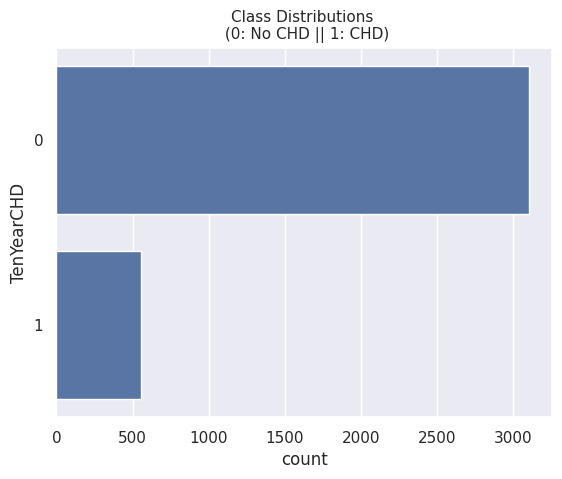

In [ ]:
sns.countplot(y='TenYearCHD', data=data)
plt.title('Class Distributions \n (0: No CHD || 1: CHD)', fontsize=11)

# Split the Data

We're going to try to predict the dependent variable.
Before we do so, let's split our data randomly into separate training and testing sets so we can test our model out-of-sample.


In [ ]:
X = data.drop('TenYearCHD', axis=1)
y = data['TenYearCHD']

## Remove Multi-Collinearity

We will have to remove columns that are very correlated with each other. Let's create a matrix where we inspect the one to one correlation between all the features.



In [ ]:
X.corr()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
male,1.000000,-0.024412,0.017729,0.206114,0.330322,-0.052124,-0.002312,0.001424,0.013819,-0.070321,-0.045358,0.051872,0.073111,-0.115285,0.002940
age,-0.024412,1.000000,-0.159499,-0.210771,-0.189295,0.134732,0.050893,0.306239,0.109092,0.268252,0.388267,0.208283,0.137511,-0.002722,0.118349
education,0.017729,-0.159499,1.000000,0.025251,0.013790,-0.013739,-0.030386,-0.078828,-0.039627,-0.013522,-0.124360,-0.058059,-0.137555,-0.064214,-0.031998
currentSmoker,0.206114,-0.210771,0.025251,1.000000,0.773913,-0.051923,-0.038150,-0.108078,-0.041849,-0.051034,-0.134428,-0.115955,-0.159821,0.050841,-0.053242
cigsPerDay,0.330322,-0.189295,0.013790,0.773913,1.000000,-0.046504,-0.036286,-0.070460,-0.036961,-0.030400,-0.094781,-0.056746,-0.087395,0.064030,-0.053726
BPMeds,-0.052124,0.134732,-0.013739,-0.051923,-0.046504,1.000000,0.113125,0.262910,0.049066,0.094083,0.271263,0.199630,0.105642,0.012889,0.054232
prevalentStroke,-0.002312,0.050893,-0.030386,-0.038150,-0.036286,0.113125,1.000000,0.066057,0.009625,0.012736,0.061070,0.055834,0.036496,-0.017019,0.016061
prevalentHyp,0.001424,0.306239,-0.078828,-0.108078,-0.070460,0.262910,0.066057,1.000000,0.080556,0.166655,0.697675,0.617734,0.302949,0.146818,0.086942
diabetes,0.013819,0.109092,-0.039627,-0.041849,-0.036961,0.049066,0.009625,0.080556,1.000000,0.048451,0.102552,0.050686,0.089009,0.060984,0.614820
totChol,-0.070321,0.268252,-0.013522,-0.051034,-0.030400,0.094083,0.012736,0.166655,0.048451,1.000000,0.219925,0.174422,0.121056,0.093053,0.049884


This might be hard to process. Let's use a heatmap instead.

*If this code is too complex, ask GenAI to explain it to you by copy-pasting and asking for a description.*

<Axes: >

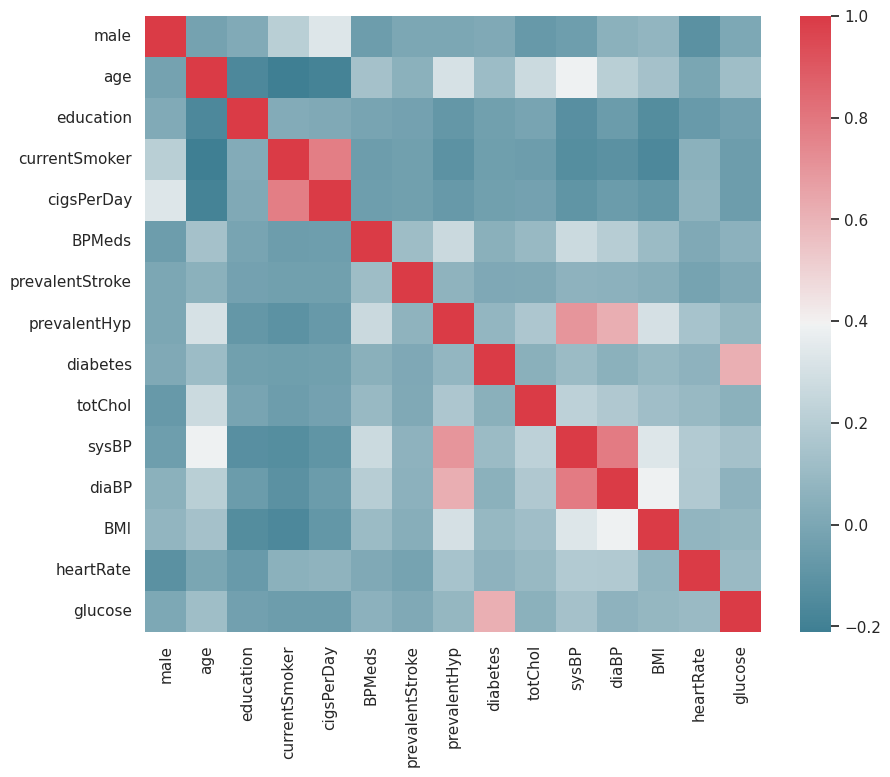

In [ ]:
f, ax = plt.subplots(figsize=(10, 8))
corr = X.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

We note that the following couples of variables are highly correlated:
*   Current Smoker and Number of Cigarettes
*   Glucose and diabetes;
*   Systolic and Diastolic Blood Pressure;

We will remove cigsPerDay, glucose, and diaBP.

In [ ]:
X.drop(['cigsPerDay', 'glucose', 'diaBP'], axis=1, inplace=True)

### Managing the randomness

Each time you are randomly splitting your data the computer uses a random number generator that is based on the current system time. Thus, if you split your data now without specifying the random state of the machine, next time you perform the command, it might return a different result. For this reason, we set the `random_state` to a given number. In this case `random_state=25`.

### Training and Testing Ratio

The `test_size` parameter determines the proportion of the dataset which will be allocated to the training set versus the testing set. In this case, 30% of the overall data will be dedicated to the out-of-sample evaluation of the model.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=16)

print(f"No. of training examples: {x_train.shape[0]}")
print(f"No. of testing examples: {x_test.shape[0]}")


No. of training examples: 2560
No. of testing examples: 1098


The method ensures that the outcome of interest is present at equal proportions in the training and testing sets. We fix the `random_state` parameter to ensure that every time we run the code, we get the same partition.

# Setting a Baseline

Before we make any predictions, let's find the accuracy of a baseline model that doesn't use any fancy methodology.

## A Simple Baseline

A simple baseline model we can use is to always predict the most common outcome in the training set.

In [ ]:
y_train.value_counts()

,count
TenYearCHD,
0,2178
1,382


## Baseline Accuracy

So the most common outcome is to assume that everyone is going to be healthy.

What is our test-set accuracy from this baseline model?
HINT: Our prediction is right only when an individual does not develop CHD.

In [ ]:
y_test.value_counts()

,count
TenYearCHD,
0,923
1,175


In [ ]:
baseline_accuracy = 100*y_test.value_counts()[0]/(len(y_test))
print("So our baseline has an accuracy of ", baseline_accuracy, '%')

So our baseline has an accuracy of  84.06193078324226 %


## An Alternative Baseline

How about if we predict 1 (CHD) if the person is currently hypertensive, and predict 0 otherwise?

In [ ]:
baseline_2 = pd.crosstab(y_train, x_train['prevalentHyp'], rownames=['10yearCHD'], colnames=['Hypertension Status'])
baseline_2

Hypertension Status,0,1
10yearCHD,,
0,1567,611
1,189,193


What is the accuracy of this baseline?

In [ ]:
100*(baseline_2.loc[0,0]+baseline_2.loc[1,1])/x_train.shape[0]

68.75

Looks like the first one was better!
Now, we're ready to build the Logistic Regression model.

# Train a Logistic Regression Model

Now, we are ready to build our model using the training set.

## The Entire Dataset

We will add a constant variable (equal to 1) such that the model can account for a bias term.

In [ ]:
x_train_logit = x_train.copy()
x_train_logit['constant']=1

model = sm.Logit(endog=y_train, exog=x_train_logit).fit()

Optimization terminated successfully.
         Current function value: 0.373277
         Iterations 7


What is the output of our model?

In [ ]:
# printing the summary table
summary = model.summary()
print(model.summary())

                           Logit Regression Results                           
Dep. Variable:             TenYearCHD   No. Observations:                 2560
Model:                          Logit   Df Residuals:                     2547
Method:                           MLE   Df Model:                           12
Date:                Wed, 19 Feb 2025   Pseudo R-squ.:                  0.1141
Time:                        22:19:38   Log-Likelihood:                -955.59
converged:                       True   LL-Null:                       -1078.7
Covariance Type:            nonrobust   LLR p-value:                 8.730e-46
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
male                0.6352      0.125      5.080      0.000       0.390       0.880
age                 0.0609      0.008      7.799      0.000       0.046       0.076
education          -0.0517      

## Remove Variables with High P-Values

Notice that some of the included factors are not statistically significant since the p-value > 0.1. Let's try to remove them and re-train the model.

In [ ]:
vars_to_remove = ['education','BPMeds','prevalentStroke','prevalentHyp','totChol','BMI','heartRate']
x_train_red = x_train.drop(vars_to_remove, axis=1)
x_train_logit_red = x_train_logit.drop(vars_to_remove, axis=1)
x_test_red = x_test.drop(vars_to_remove, axis=1)

Now we can train again on the reduced dataset.

In [ ]:
model2 = sm.Logit(endog=y_train, exog=x_train_logit_red).fit()
# printing the summary table
print(model2.summary())

Optimization terminated successfully.
         Current function value: 0.374394
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             TenYearCHD   No. Observations:                 2560
Model:                          Logit   Df Residuals:                     2554
Method:                           MLE   Df Model:                            5
Date:                Wed, 19 Feb 2025   Pseudo R-squ.:                  0.1114
Time:                        22:19:52   Log-Likelihood:                -958.45
converged:                       True   LL-Null:                       -1078.7
Covariance Type:            nonrobust   LLR p-value:                 6.230e-50
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
male              0.6124      0.123      4.996      0.000       0.372       0.853
age               0.

# Making Predictions

The `statsmodels` baseline is a great way to summarize and understand the derived logistic regression model. However, for machine learning purposes the `sklearn` library provides us with more tools and functionalities. For this reason, we will re-train with the new module.

## Re-train with Scikit-Learn

In [ ]:
from sklearn.linear_model import LogisticRegression
# Make an instance of the Model
# Most parameters not specified are set to their defaults
logisticRegr = LogisticRegression(max_iter=900, penalty=None)
logisticRegr.fit(x_train_red, y_train)

LogisticRegression(max_iter=900, penalty=None)

## Predictions on the Training Set

Let's first get the predictions of the model on the training set.

In [ ]:
y_train_predictions = logisticRegr.predict_proba(x_train_red)

What is the prediction? A probability for each class!

In [ ]:
y_train_predictions

array([[0.87673729, 0.12326271],
       [0.81684429, 0.18315571],
       [0.8204773 , 0.1795227 ],
       ...,
       [0.93184333, 0.06815667],
       [0.92138602, 0.07861398],
       [0.88400066, 0.11599934]])

## Predictions on the Testing Set

In [ ]:
y_test_predictions = logisticRegr.predict_proba(x_test_red)

# Model Evaluation - Discrimination Performance

In order to evaluate the performance of a binary classification model, we would like to understand how well the model correctly classifies observations. We will apply a suite of evaluation metrics to assess the performance of the model.



## Threshold Based Metrics

While binary classification algorithms return the probability of getting CHD within 10 years, we ultimately want to translate this probability into a prediction of whether a patient will get sick or not. We can select a **probability cutoff threshold** ($t$) between 0 and 1 and predict the occurence of the disease for the patients with probabilities higher than $t$ and no adverse outcome for the others. A natural threshold choice is $t=0.5$, which amounts to predicting the most likely outcome.

Once we have established a cutoff threshold, we can compute a $2\times 2$ confusion matrix for the model. This matrix reports the number of correct and incorrect classifications for each outcome at a given probability cutoff threshold (e.g. 0.5). The confusion allows us to calculate several threshold-based evaluation metrics.

In [ ]:
t = 0.5

Let's convert now to binary choices the probability predictions

In [ ]:
# Get the second column of the array that reflects the probability that 10yearCHD=10
y_test_bin_pred = np.where(y_test_predictions[:,1] > t, 1, 0)

In [ ]:
y_test_bin_pred

array([0, 0, 0, ..., 0, 1, 0])

Load the library with the ML metrics

In [ ]:
from sklearn import metrics

##Accuracy

Let's first calculate the accuracy of the model.
The % of the observations that are correctly classified.

We will first construct the confusion matrix.

In [ ]:
cm = metrics.confusion_matrix(y_test, y_test_bin_pred)
print(cm)

[[906  17]
 [160  15]]


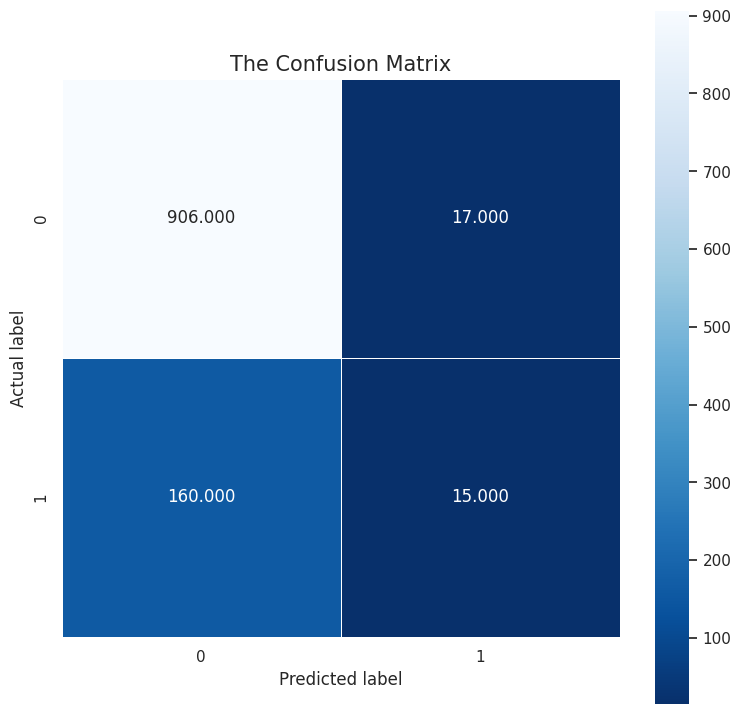

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'The Confusion Matrix'.format(t)
plt.title(all_sample_title, size = 15);

In [ ]:
accuracy = 100*(cm[0,0]+cm[1,1])/(cm.sum())
print('The confusion matrix that the accuracy of our model is:', accuracy)

The confusion matrix that the accuracy of our model is: 83.87978142076503


This is better than our baseline!

## Sensitivity (true positive rate):

The proportion of sick patients (true positives) that are correctly identified in the model.  Calculation: $TP/(TP + FN)$, where $TP$ is the number of true positives and $FP$ the number of false positives.

In [ ]:
sensitivity = 100*((cm[1,1])/(cm[1,0]+cm[1,1]))
print(sensitivity)

8.571428571428571


## Specificity (true negative rate):
The proportion of healthy patients (true negatives) who are correctly identified. Calculation: $TN/(TN + FP)$.

In [ ]:
specificity = 100*((cm[0,0])/(cm[0,0]+cm[0,1]))
print(specificity)

98.15817984832069


**How would you evaluate our model?**
What type of error is more important??

The choice of the threshold matters a lot! What about a metric that does not depend on the threshold?

## The ROC Curve

The receiver operating characteristic (ROC) curve is another common tool used with binary classifiers. The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).

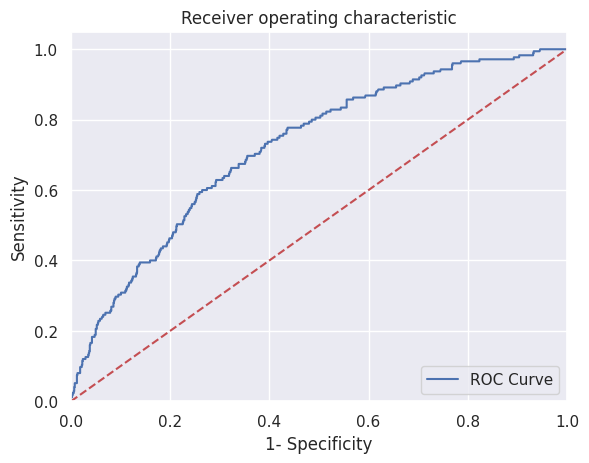

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_test_predictions[:,1])
plt.figure()
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1- Specificity')
plt.ylabel('Sensitivity')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## The Area Under the ROC Curve (AUC)

The AUC is the area under the ROC curve. The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes.

When AUC = 1, then the classifier is able to perfectly distinguish between all the Positive and the Negative class points correctly. If, however, the AUC had been 0, then the classifier would be predicting all Negatives as Positives, and all Positives as Negatives.

When $0.5<$AUC$<1$, there is a high chance that the classifier will be able to distinguish the positive class values from the negative class values. This is so because the classifier is able to detect more numbers of True positives and True negatives than False negatives and False positives.

In [ ]:
logit_roc_auc = roc_auc_score(y_test, y_test_predictions[:,1])
print(logit_roc_auc)

0.7223340040241448


# Exercise 1

**Alternative Thresholds**
What if we try different thresholds? Calculate the accuracy, sensitivity, and specificity for the following options:
*   Option 1: t=0.6
*   Option 2: t=0.1

What do you observe?

# Exercise 2

**Precision.**

The **precision** metric is the ratio $TP/ (TP + FP)$. The precision is intuitively the ability of the classifier to not label a sample as positive if it is negative.

**Calculate the confusion matrix for the testing set for `t=0.5` and compute the precision metric.** You can use the code from above.

# Exercise 3

**Regularization in Logistic Regression.**

To add Lasso on the Logistic Regression function, you will need to run the following command:

`log = LogisticRegression(penalty='l1', solver='liblinear')`

Use the entire training data set, `x_train` and look into the values of the derived coefficients.

**Have any variables been assigned non-zero coefficients?**
**What is the AUC on the testing set?**


# OPTIONAL: Model Evaluation - Calibration Performance

See also slide at the end of the lecture slides. As usual, ask ChatGPT and BARD for additional information and feel free to ask questions in our next session.

In [ ]:
from sklearn.calibration import calibration_curve

In [ ]:
prob_true, prob_pred = calibration_curve(y_test, y_test_predictions[:,1], n_bins = 10, normalize = True)
# Plot calibration curve

# Plot perfectly calibrated
plt.plot([0, 1], [0, 1], linestyle = '--', label = 'Ideally Calibrated')

# Plot model's calibration curve
plt.plot(prob_pred, prob_true, marker = '.', label = 'Logistic Regression Classifier')

leg = plt.legend(loc = 'upper left')
plt.xlabel('Average Predicted Probability in each bin')
plt.ylabel('Ratio of positives')
plt.show()

# OPTIONAL Precision, Recall, F-measure and Support

The **precision** is the ratio $TP/ (TP + FP)$. The precision is intuitively the ability of the classifier to not label a sample as positive if it is negative.

The **recall** is the ratio $TP / (TP + FN)$. The recall is intuitively the ability of the classifier to find all the positive samples.

The **F-beta** score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0. The F-beta score weights the recall more than the precision by a factor of beta. beta = 1.0 means recall and precision are equally important.

The **support** is the number of occurrences of each class in y_test.

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_bin_pred))